# Запуск модели с фиксированными параметрами и различными значениями начального состояния псевдослучайного генератора

* Запустим модель с указанием параметра S для получения количества шагов, пройденных моделью, в качестве возвращаемого значения
* Создается модель на поле 3000x3000
* Создаются 200 хищников и 200 жертв
* Значения начального состояния псевдослучайного генератора итерируются от 0 до 1000

Запуск модели осуществляется 1000 раз, в пуле отдельных процессов

In [12]:
from multiprocessing import Pool

import ppmodel
from ppmodel import ModelParams


if __name__ == '__main__':
    p = Pool(4)
    params = []
    for i in range(0, 1000):
        params.append(ModelParams("S", 100, 100, 1, 1200, 125, 70, i))
    steps = p.map(ppmodel.f, params)

KeyboardInterrupt: 

В массиве `steps` созранены результаты запуска модели

TODO: не хочу соврать, что тут происходит, предлагаю описать подробнее

In [10]:
import numpy as np

steps.sort()
steps2 = steps[:910]
print(steps2)
n_bins = int(np.ceil(np.sqrt(len(steps))))
sigma = np.std(steps2)
mu = np.mean(steps2)

[40, 40, 40, 40, 40, 40, 40, 40, 40, 41, 42, 42, 42, 44, 46, 46, 46, 48, 49, 50, 51, 51, 55, 60, 63, 69, 72, 73, 74, 74, 76, 76, 76, 77, 78, 78, 79, 80, 80, 82, 82, 83, 83, 84, 84, 85, 86, 86, 87, 88, 88, 89, 89, 90, 90, 91, 91, 92, 92, 92, 92, 92, 92, 93, 93, 93, 93, 94, 94, 94, 94, 94, 94, 94, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 102, 102, 102, 102, 102, 102, 102, 102, 102, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 106, 106

# Гистограмма распределения длительности жизни модели

Построим гистограмму распределения вероятности длительности жизни модели

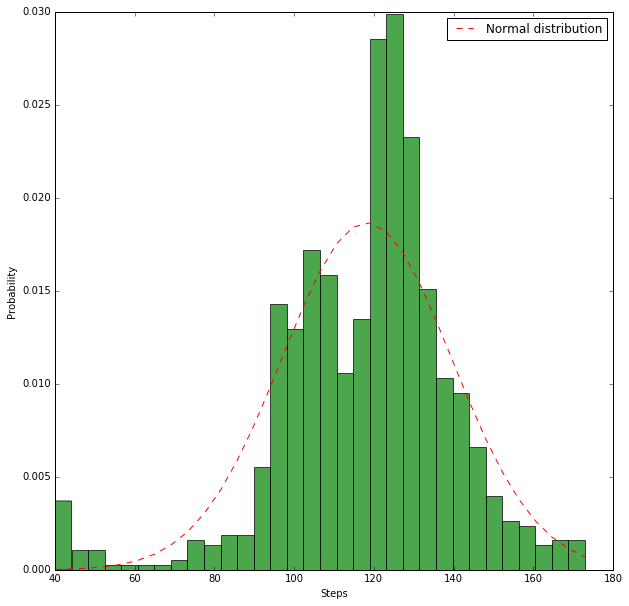

Maximum: 17640 steps
Maximum: 40 steps


In [11]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(10, 10))
n, bins, patches = plt.hist(steps2, n_bins, normed=True, color="green", alpha=0.7,)

norm_pdf = mlab.normpdf(bins, mu, sigma)

plt.plot(bins, norm_pdf, "r--", label="Normal distribution")
plt.ylabel("Probability")
plt.xlabel("Steps")
plt.legend()
plt.show()

print("Maximum: %i steps" % (max(steps)))
print("Maximum: %i steps" % (min(steps)))